In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


<IPython.core.display.Javascript object>

In [3]:
absent = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv",
    sep=";",
)

<IPython.core.display.Javascript object>

In [4]:
og_absent = absent.copy()

<IPython.core.display.Javascript object>

In [5]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


<IPython.core.display.Javascript object>

We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [6]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

<IPython.core.display.Javascript object>

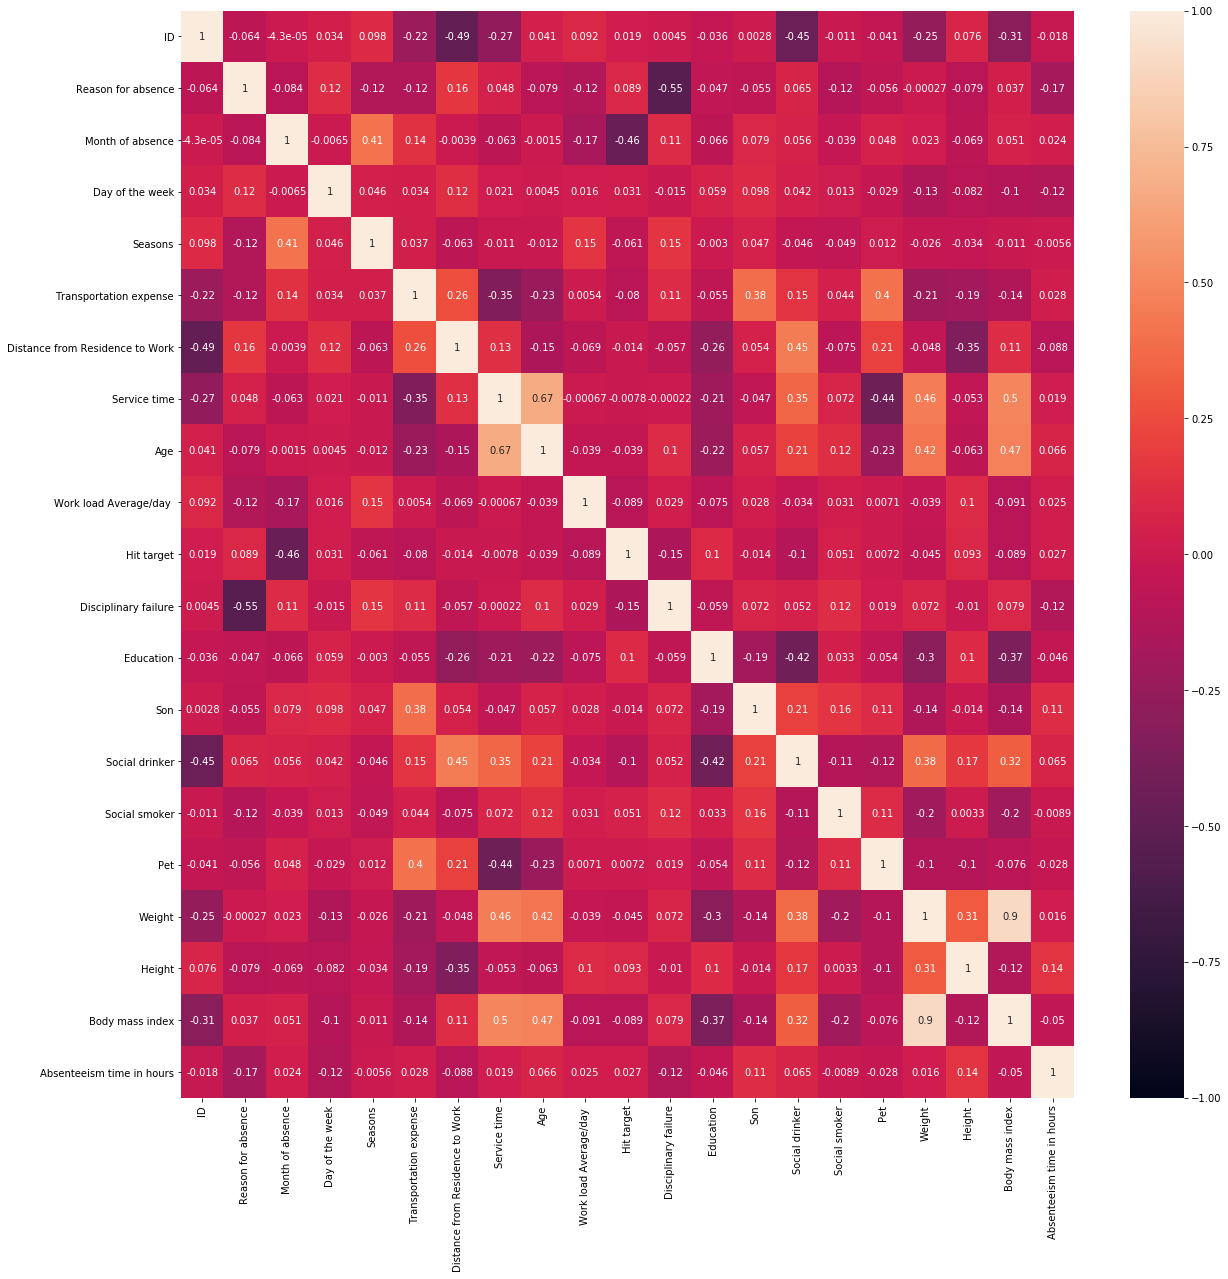

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(absent.corr(), vmin=-1, vmax=1, annot=True)

In [11]:
#answer below:
absent.drop(['ID', 'Height', 'Weight'],1)


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,0


<IPython.core.display.Javascript object>

In [15]:
reason_counts = absent["Reason for absence"].value_counts()
above_thresh_diseases = reason_counts[reason_counts > 8]
keep_reasons = above_thresh_diseases.index

<IPython.core.display.Javascript object>

In [16]:
reason_filter = absent["Reason for absence"].isin(keep_reasons)
absent.loc[-reason_filter, "Reason for absence"] = -1
absent["Reason for absence"].value_counts()

 23    149
 28    112
 27     69
 13     55
-1      48
 0      43
 19     40
 22     38
 26     33
 25     31
 11     26
 10     25
 18     21
 14     19
 1      16
 7      15
Name: Reason for absence, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
X = absent.drop(["Absenteeism time in hours", "Height", "Weight", "ID"], 1)
y = absent["Absenteeism time in hours"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Scale the independent variables using the standard scaler

In [21]:
X["Education"].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
c for c in X if c not in cat_cols + bin_cols

In [24]:
cat_cols + bin_cols

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Education',
 'Disciplinary failure',
 'Social drinker',
 'Social smoker',
 'Pet']

<IPython.core.display.Javascript object>

In [28]:
# answer below:
bin_cols = ['Disciplinary failure', 'Social drinker','Social smoker','Pet']

cat_cols = ["Reason for absence", 'Month of absence','Day of the week','Seasons','Education']
drop_cats = [23,3,2,4,1]
# dropped it off of value counts (highest amount)

num_cols = [c for c in X if c not in cat_cols + bin_cols]


<IPython.core.display.Javascript object>

In [29]:
num_cols

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Son',
 'Body mass index']

<IPython.core.display.Javascript object>

In [30]:
preprocessing = ColumnTransformer(
    [
        ("encode_cats", OneHotEncoder(drop=drop_cats), cat_cols),
        ("scale", StandardScaler(), num_cols),
    ],
    remainder="passthrough",
)


<IPython.core.display.Javascript object>

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [31]:
# answer below:
# fmt: off
pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('svr', SVR(kernel='linear'))
    ],
)
# fmt: on



<IPython.core.display.Javascript object>

In [32]:
pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.07615283092298686
test_score: 0.11966449416006442


<IPython.core.display.Javascript object>

If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [37]:
# answer below:
grid = {
    "svr__epsilon": [0.3, 0.6, 0.9,1.2],
    "svr__C": [ 1, 10,100],
    "svr__kernel": ["rbf", "linear",'poly'],
    'svr__degree':[2,3,5]
}

pipeline_cv = GridSearchCV(pipeline, grid, verbose=1, cv=2, n_jobs=-1)
pipeline_cv.fit(X_train, y_train)

print("Best hyperparameters:")
pipeline_cv.best_params_


Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 205 out of 216 | elapsed:    9.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   12.5s finished


Best hyperparameters:


{'svr__C': 100, 'svr__degree': 2, 'svr__epsilon': 0.6, 'svr__kernel': 'linear'}

<IPython.core.display.Javascript object>

In [38]:
train_score = pipeline_cv.score(X_train, y_train)
test_score = pipeline_cv.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.08483660457647912
test_score: 0.12671413142814436


<IPython.core.display.Javascript object>

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [40]:
# answer below:
y_pred = pipeline_cv.predict(X_test)

resid = y_pred-y_test



<IPython.core.display.Javascript object>

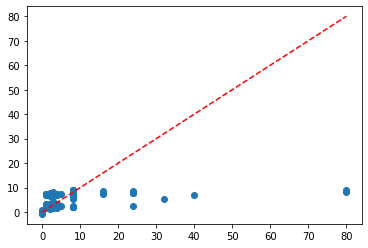

<IPython.core.display.Javascript object>

In [41]:
mn = y_test.min()
mx = y_test.max()


plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], "--", c="r")